In [23]:
#los tienen?
import itertools
import networkx as nx

In [117]:
import pandas as pd
users=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_ZAlzgxG5dU_ZPMRbdNusU0zlbba4bWz0VVkAlwt7Z3ds3ieejgXFicoj4sJU6sQMpno1nilijnDf/pub?gid=0&single=true&output=csv")

In [118]:
users

Nombre  Bancada  Circunscripcion  \
0                      Wilmer Aguilar Montenegro       FP        Cajamarca   
1              Victor Augusto Albrecht Rodríguez       FP           Callao   
2                        Percy Eloy Alcalá Mateo       FP  Lima Provincias   
3         María Lourdes Pía Luisa  Alcorta Suero       FP            Lima    
4                    Betty Gladys Ananculi Gómez       FP              Ica   
5    Gladys Griselda Andrade Salguero de Álvarez       FP  Lima Provincias   
6                        Alejandra Aramayo Gaona       FP         Arequipa   
7                        Tamar Arimborgo Guerra        FP           Loreto   
8                     Rosa María Bartra Barriga        FP      La Libertad   
9            Héctor Virgilio Becerril Rodríguez        FP       Lambayeque   
10                   Karina Juliza Beteta Rubín        FP          Huánuco   
11                  César Milton Campos Ramírez        FP          Huánuco   
12                Miguel Antonio Castro Grández        FP         Amazonas   
13             Cecilia Isabel Chacón De Vettori        FP             Lima   
14                 Leyla Felícita Chihuán Ramos        FP             Lima   
15                    Nelly Lady Cuadros Candia        FP            Cusco   
16               Juan Carlos Del Águila Cárdenas       FP           Loreto   
17                         Joaquín Dipas Huamán        FP         Ayacucho   
18             Carlos Alberto Domínguez Herrera        FP           Áncash   
19                    Miguel Ángel Elías Ávalos        FP              Ica   
20                      Modesto Figueroa Minaya        FP    Madre de Dios   
21              Luis Fernando Galarreta Velarde        FP             Lima   
22         Juan Carlos Eugenio Gonzales Ardiles        FP             Lima   
23                       Israel Tito Lazo Julca        FP            Junin   
24           María Úrsula Ingrid Letona Pereyra        FP             Lima   
25                       Mártires Lizana Santos        FP            Piura   
26                   Luis Humberto López Vilela        FP            Piura   
27                   Moíses Mamani Colquehuanca        FP             Puno   
28                  Mario Fidel Mantilla Medina        FP         Moquegua   
29            Guillermo Hernán Martorell Sobero        FP            Tacna   
..                                           ...      ...              ...   
100                  Galván Vento Clayton Flavio    NOagr            Pasco   
101               García Jiménez Maritza Matilde    NOagr            Piura   
102                       Herrera Arévalo Marita    NOagr         Amazonas   
103                    Noceda Chiang Paloma Rosa    NOagr             Lima   
104       Olaechea Álvarez Calderón Pedro Carlos    NOagr             Lima   
105                    Palma Mendoza José Marvín    NOagr       Lambayeque   
106                   Robles Uribe Lizbeth Hilda    NOagr   Lima provincia   
107                   Rosas Huaranga Julio Pablo    NOagr             Lima   
108             Vieira Portugal Roberto Gamaniel    NOagr             Lima   
109                     Yika García Luis Alberto    NOagr      La Libertad   
110             Zeballos Salinas Vicente Antonio    NOagr         Arequipa   
111                   Pariona Tarqui Tania Edith  NuePeru         Ayacucho   
112           Quintanilla Chacón Alberto Eugenio  NuePeru             Puno   
113                      Zeballos Patrón Horacio  NuePeru         Arequipa   
114                   Pacori Mamani Oracio Ángel  NuePeru             Puno   
115                     Ochoa Pezo Édgar Américo  NuePeru            Cusco   
116                  Huilca Flores Indira Isabel  NuePeru             Lima   
117                            Glave Remy Marisa  NuePeru             Lima   
118   Dammert Ego Aguirre Manuel Enrique Ernesto  NuePeru             Lima   
119                         Arce Cáceres Richard  NuePeru       

In [4]:
usersIDs=list(users.Cuenta)

In [ ]:
usersIDs

In [22]:
# get the security info from file
import json
keysAPI = json.load(open('keys.txt','r'))
# credentials from https://apps.twitter.com/
consumerKey = keysAPI['consumer_key']
consumerSecret = keysAPI['consumer_secret']
accessToken = keysAPI['access_token']
accessTokenSecret = keysAPI['access_token_secret']

# using security info:
import tweepy

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api=tweepy.API(auth, wait_on_rate_limit=True,timeout=120,wait_on_rate_limit_notify=True,parser=tweepy.parsers.JSONParser())

In [6]:
amongLegis = nx.DiGraph()
timeOuts=[]
for a,b in itertools.combinations(list(usersIDs),2):
    try:
        res=api.show_friendship(source_screen_name=a,target_screen_name=b)
        status=res['relationship']['source']['following'], res['relationship']['target']['following']    
        print (res)
        if status[0] and status[1]:
            amongLegis.add_edge(a, b)
            amongLegis.add_edge(b, a)
        if status[0] and not status[1]:
            amongLegis.add_edge(a, b)
        if not status[0] and status[1]:
            amongLegis.add_edge(b, a)
    except:
        timeOuts.append((a,b))
        continue
        

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 886978286538166273, 'id_str': '886978286538166273', 'screen_name': 'Wilmer_AguilarM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

Rate limit reached. Sleeping for: 745


{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': N

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 757589824555606016, 'id_str': '757589824555606016', 'screen_name': 'VictorAlbrecht_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'tar

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

Rate limit reached. Sleeping for: 781


{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 101939878471398

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869,

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_st

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396, 'i

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 28535987

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9510999640081

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {

{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

Rate limit reached. Sleeping for: 769


{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marke

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

Rate limit reached. Sleeping for: 777


{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 721817372131246081, 'id_str': '721817372131246081', 'screen_name': 'GladysAndradeSA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies'

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 750722424304467968, 'id_str': '750722424304467968', 'screen_name': 'AleAramayoGaona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762785998858256385, 'id_str': '762785998858256385', 'screen_name': 'Arimborgotammy', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 72501147590395

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 27

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '2

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str'

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16

{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 67978697, 'id_str': '67978697', 'screen_name': 'rosamariabartra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_s

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1019398784713

Rate limit reached. Sleeping for: 781


{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 811219067596

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 704427010932809

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 248295596, 'id_s

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str

Rate limit reached. Sleeping for: 780


{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 78123700025491

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482

{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies':

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

Rate limit reached. Sleeping for: 775


{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 816385602799202304, 'id_str': '816385602799202304', 'screen_name': 'MiguelCastroGra', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str'

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str':

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'i

Rate limit reached. Sleeping for: 764


{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 27

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'i

{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 338785219, 'id_str': '338785219', 'screen_name': 'chechechacon', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 632188540, 'id_str': 

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 844290435967324160, 'i

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76350367088132096

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76831334458759577

{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 190099760, 'id_str': '190099760', 'screen_name': 'LeylaChihuan', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

Rate limit reached. Sleeping for: 775


{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'ma

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054324, 'id_str':

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794

Rate limit reached. Sleeping for: 748


{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235351501, 'id_str': '235351501', 'screen_name': 'JuanCarlosDelAg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 702531317972541440, 'id_str': '702531317972541440', 'screen_name': 'KalinDominguez', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'ma

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 472159850, 'id_str':

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 252200707, 'id_str': '252

Rate limit reached. Sleeping for: 730


{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_s

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76831334458759

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 703013145065996288, 'i

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': 

Rate limit reached. Sleeping for: 780


{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': 

{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 55181597, 'id_str': '55181597', 'screen_name': 'luchogalarreta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_s

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 413210608, 

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764926784756482050, '

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str'

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9188

{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 632188540, 'id_str': '632188540', 'screen_name': 'JCGonzalesA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

Rate limit reached. Sleeping for: 779


{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'ma

{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 703013145065996288, 'id_str': '703013145065996288', 'screen_name': 'IsraelLazoJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 844290435967324160,

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, '

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7635036708

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7812370002549186

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 

{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878117309, 'id_str': '4878117309', 'screen_name': 'UrsulaLetonaP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

Rate limit reached. Sleeping for: 775


{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'ta

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 198228

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '17

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str':

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, '

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str':

{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

Rate limit reached. Sleeping for: 751


{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 413210608, 'id_str': '413210608', 'screen_name': 'lucholopezv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': N

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 982265471847219202, 'id_str': '982265471847219202', 'screen_name': 'MoisesMamaniCo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'ta

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

Rate limit reached. Sleeping for: 769


{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mark

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'ta

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7649267847564820

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396,

Rate limit reached. Sleeping for: 744


{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 

{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1710876594, 'id_str': '1710876594', 'screen_name': 'ElardMelgarV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 796214495580397569, 'id_str': '796214495580397569', 'screen_name': 'MaryMelgarejoP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 72501147

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

Rate limit reached. Sleeping for: 762


{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344

{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 29

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7617

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054324, 'id_str': '710

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str'

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7639244867940229

{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 472159850, 'id_str': '472159850', 'screen_name': 'Monterola11', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'i

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_

Rate limit reached. Sleeping for: 763


{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_s

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 534987521, 'id_str': '534987521', 'screen_name': 'angelneyra2016', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mark

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marke

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_

{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mark

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3146617763, 'id_str': '3

Rate limit reached. Sleeping for: 683


{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_str'

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, '

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776,

{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 844290435967324160, 'id_str': '844290435967324160', 'screen_name': 'franpetrozzi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

Rate limit reached. Sleeping for: 771


{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763840017064194054, 'id_str': '763840017064194054', 'screen_name': 'YeseniaPonceV', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7642198081456

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607616, 'id_str

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317'

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '58102838

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '487846120

{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '6319

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies'

Rate limit reached. Sleeping for: 774


{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies'

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replie

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 469393766, 'id_str': '46

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 43

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '24

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'i

{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'tar

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 23670564

{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'ta

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marke

Rate limit reached. Sleeping for: 778


{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 725011475903950848, 'id_str': '725011475903950848', 'screen_name': 'dsalaverryv', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764219808145629184, 'id_str': '764219808145629184', 'screen_name': 'msalazarcongres', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str'

{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, '

{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 26106346

{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 

Rate limit reached. Sleeping for: 779


{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targe

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_str': '3

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396, 'id_str'

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 951099964008124416,

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9

{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2522

{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416607974, 'id_str': '1416

{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_str': 

{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2

{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 

{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76301543134711398

Rate limit reached. Sleeping for: 779


{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 248295596, 'id_str': '248295596', 'screen_name': 'FSarmiento3', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 761

{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054324, 'id_str': 

{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_

{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913

{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 252200707, 'id_str': '252200707', 'screen_name': 'KarlaSchaefer', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1035263143163961345, 'id_str': '1035263143163961345', 'screen_name': 'CesarSeguraL', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607616,

Rate limit reached. Sleeping for: 774


{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7812370002549186

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76831334458759577

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 939107854061096960, 'id_st

{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4441804276, 'id_str': '444180427

{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745, 'id_str':

{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 78529074828

{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 469393766, 'id_str': '469393766', 'screen_name': 'stapiab', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9666498872

{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

Rate limit reached. Sleeping for: 774


{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': N

{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763117990426607

{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_

{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_s

{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_st

{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2594077129, 'id_str': '2594077129', 'screen_name': 'MIKI_Torres_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_

{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276628

{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '26226

{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '2

{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 162076

{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str

Rate limit reached. Sleeping for: 778


{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76301543134711398

{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416607974, 'id_str': '141660

{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_str': '23

{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2

{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, '

{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364503633, 'id_str': '364503633', 'screen_name': 'TubinoCarlos', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 

{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 764926784756482050, 'id_str': '764926784756482050', 'screen_name': 'GliderUshnahua', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_s

{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'targ

Rate limit reached. Sleeping for: 824


{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_

{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610,

{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_

{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2766284744, 'id_str': '2766284744', 'screen_name': 'eduvergara', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

Rate limit reached. Sleeping for: 824


{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763117990426607616, 'id_str': '763117990426607616', 'screen_name': 'PanchoVillaFP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mark

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '262268308', 'scr

{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 's

Rate limit reached. Sleeping for: 824


{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 's

{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76248506136717721

{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 68038314, 'id_str': '68038314', 'screen_name': 'MecheAF', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76464130368668057

{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_st

{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 73628383149023

{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1416607974, 'id_str': '1416607974', 'screen_name': 'Carlos_Bruce', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76301543134711

{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 939107854061096960, 'id_str': '939107854061096960', 'screen_name': 'AnaMaraChoqueh2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

Rate limit reached. Sleeping for: 823


{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam'

{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 869224391523000320, 'id_str': '869224391523000320', 'screen_name': 'ElTioSergioDav', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '4504

{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7786135746672

{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4331207861, 'id_str': '4331207861', 'screen_name': 'PatyDonayre', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id

{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target

{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'tar

{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_s

{'relationship': {'source': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'tar

Rate limit reached. Sleeping for: 823


{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_st

{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 73628383149023641

{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2292037112, 'id_str': '2292037112', 'screen_name': 'moisesguiap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113

{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_

{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416

{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7630154313471139

{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4441804276, '

{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855745

{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 538220396, 'id_str': '538220396', 'screen_name': 'GuidoLombardiE', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

Rate limit reached. Sleeping for: 824


{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_

{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7717250293777

{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315

{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528

{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7652

{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279

{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 71054

{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '1416701

Rate limit reached. Sleeping for: 823


{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, '

{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str'

{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str'

{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'i

{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '4

{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7

{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 71054324, 'id_str': '71054324', 'screen_name': 'gilbertvioleta', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7646

{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id_str': '942783

{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 77941467

{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 111815940, 'id_str': '111815940', 'screen_name': 'JorgeDCG', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653,

{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2610634610, 'id

{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str'

Rate limit reached. Sleeping for: 823


{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9

{'relationship': {'source': {'id': 45048171, 'id_str': '45048171', 'screen_name': 'LUCIANA_LEON_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 8635167248298557

{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {

{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'i

{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4441804276, 'id_str': '4441804276', 'screen_name': 'Rodriguez22E', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_

{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'i

{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 43633

{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, '

{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 216721738, 'id_str': '216721738', 'screen_name': 'JVelasquezQ', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 863516724829855

Rate limit reached. Sleeping for: 781


{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '

{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None},

{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1416701

{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 487846120

{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 

{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target

{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {

{'relationship': {'source': {'id': 2610634610, 'id_str': '2610634610', 'screen_name': 'GloriaMonteneg', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

Rate limit reached. Sleeping for: 766


{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76831334458759577

{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 285359870, 'id_str': '285359870', 'screen_name': 'ricarnarvaez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spa

{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 970486105018716160, 'id_str': '970486105018716160', 'screen_name': 'CsarHenryVsque1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': 

{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16

{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2551357284, 'id_str': '2551357284', 'screen_name': 'CesarVPeru', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 9

{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7

{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15

{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 942783889, 'id

{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

Rate limit reached. Sleeping for: 745


{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595

{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 581028389, 'id_str': '581028389', 'screen_name': 'VictorAndresGB', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {

{'relationship': {'source': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 

{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {

{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, '

{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, '

{'relationship': {'source': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, '

{'relationship': {'source': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 276689069, 'id_str': '276689069', 'screen_name': 'eddelaguila', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_

{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

Rate limit reached. Sleeping for: 771


{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 863516724829855745, 'id_str': '863516724829855745', 'screen_name': 'lucioavilapuno', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam

{'relationship': {'source': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 3020554397, 'id_str': '3020554397', 'screen_name': 'BustosEstelita', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': N

{'relationship': {'source': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 771725029377773568, 'id_str': '771725029377773568', 'screen_name': 'jacastrobravo', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4363374021, 'id_str': '4363374021', 'screen_name': 'CostaGino', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str

{'relationship': {'source': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022

{'relationship': {'source': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 16077528, 'id_str': '16077528', 'screen_name': 'AlbertoBelaunde', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801

{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4878461206, 'id_st

{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_

Rate limit reached. Sleeping for: 779


{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 951099964008124416, 'id_str': '951099964008124416', 'screen_name': 'GalvanClayton', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'm

{'relationship': {'source': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763109968434307072, 'id_str': '763109968434307072', 'screen_name': 'MherreraMarita', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

{'relationship': {'source': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1620768931, 'id_str': '1620768931', 'screen_name': 'PalomaNoceda', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_st

{'relationship': {'source': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target':

{'relationship': {'source': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4878461206, 'id_str': '4878461206', 'screen_name': 'Pedro_Olaechea', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767

{'relationship': {'source': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763924486794022913, 'id_str': '763924486794022913', 'screen_name': 'josemarvinpalma', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies'

{'relationship': {'source': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

Rate limit reached. Sleeping for: 723


{'relationship': {'source': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'i

{'relationship': {'source': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 736283831490236416, 'id_str': '736283831490236416', 'screen_name': 'RobertoVieiraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None

{'relationship': {'source': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 785290748287717376, 'id_str': '785290748287717376', 'screen_name': 'LUIS_YIKA', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked

{'relationship': {'source': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 15

{'relationship': {'source': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7

{'relationship': {'source': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2367056482, 'id_str': '2367056482', 'screen_name': 'TaniaPariona', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 768313344587595776, 'id_str': '768313344587595776', 'screen_name': 'aquintanillach_', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

{'relationship': {'source': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 765250304803794944, 'id_str': '765250304803794944', 'screen_name': 'HoracioZeballo', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': 

{'relationship': {'source': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762485061367177218, 'id_str': '762485061367177218', 'screen_name': 'oraciopacori', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marke

{'relationship': {'source': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 771370470767820801, 'id_str': '771370470767820801', 'screen_name': 'MARIOCANZIO2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 933342701273206784, 'id_str': '933342701273206784', 'screen_name': 'pezo_ochoa', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mark

{'relationship': {'source': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 15043710, 'id_str': '15043710', 'screen_name': 'IndiraHuilca', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str':

Rate limit reached. Sleeping for: 763


{'relationship': {'source': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_s

{'relationship': {'source': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': 

{'relationship': {'source': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 63195697, 'id_str': '63195697', 'screen_name': 'RichardArcePeru', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76

{'relationship': {'source': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 3018787653, 'id_str': '3018787653', 'screen_name': 'japazaordonez', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target'

{'relationship': {'source': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 763015431347113984, 'id_str': '763015431347113984', 'screen_name': 'HCevallosFlores', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': No

{'relationship': {'source': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': Non

In [ ]:
print(str(a))

In [9]:
#para Gephi:
nx.write_graphml(amongLegis, "amongLegis.graphml")

In [10]:
#para R:
pd.DataFrame(list(amongLegis.edges()),columns=['from','to']).to_csv("amongLegis_edgelist.csv")

#en R:
#redat=read.csv(amongLegis_edgelist.csv,header=TRUE)
# g=graph.data.frame(redata,directed=FALSE)

In [12]:
timeOuts

[('VictorAlbrecht_', 'MIKI_Torres_'),
 ('percy_mateo', 'juliorosas1'),
 ('BettyAnanculi', 'franpetrozzi'),
 ('GladysAndradeSA', 'lucioavilapuno'),
 ('AleAramayoGaona', 'luchogalarreta'),
 ('Arimborgotammy', 'guimartorell'),
 ('Arimborgotammy', 'Mauriciomulder'),
 ('hectorbecerrilr', 'KalinDominguez'),
 ('KarinaBeteta01', 'JVelasquezQ'),
 ('MiguelCastroGra', 'lucholopezv'),
 ('chechechacon', 'MiguelRoman_V'),
 ('NellyCuadrosC', 'dsalaverryv'),
 ('JuanCarlosDelAg', 'TaniaPariona'),
 ('JoaquinDipasH', 'yonhy_lescano'),
 ('MiguelAElias', 'milytakayama'),
 ('CR_MFigueroaM', 'guimartorell'),
 ('luchogalarreta', 'MherreraMarita'),
 ('IsraelLazoJ', 'GuidoLombardiE'),
 ('mlizana73', 'EstherSVoficial'),
 ('lucholopezv', 'MARIOCANZIO2'),
 ('mariomantilla7', 'AlbertoBelaunde'),
 ('ElardMelgarV', 'JVelasquezQ'),
 ('miyashiromarco', 'PatyDonayre'),
 ('angelneyra2016', 'GliderUshnahua'),
 ('fedepariona', 'milytakayama'),
 ('YeseniaPonceV', 'KarlaSchaefer'),
 ('MCRamosRosales', 'milytakayama'),
 ('MCR

In [15]:
pd.DataFrame(list(timeOuts()).to_csv("amongLegis_edgelist.csv")

SyntaxError: unexpected EOF while parsing (<ipython-input-15-1cd8a18afda2>, line 1)

In [1]:
import pandas as pd



In [17]:
missing=pd.read_excel("TimeOuts.xlsx",header=None)

In [25]:
amongLegis2 = nx.DiGraph()
timeOuts=[]
for a,b in zip(missing[0],missing[1]):
    try:
        res=api.show_friendship(source_screen_name=a,target_screen_name=b)
        status=res['relationship']['source']['following'], res['relationship']['target']['following']    
        print (res)
        if status[0] and status[1]:
            amongLegis2.add_edge(a, b)
            amongLegis2.add_edge(b, a)
        if status[0] and not status[1]:
            amongLegis2.add_edge(a, b)
        if not status[0] and status[1]:
            amongLegis2.add_edge(b, a)
    except:
        timeOuts.append((a,b))
        continue

{'relationship': {'source': {'id': 305239519, 'id_str': '305239519', 'screen_name': 'VictorAlbrecht', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 149815507, 'id_str': '149815507', 'screen_name': 'miki_torres', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 940771447567454208, 'id_str': '940771447567454208', 'screen_name': 'percy_mateo', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 126448628, 'id_str': '126448628', 'screen_name': 'MiguelAElias', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 811219067596050433, 'id_str': '811219067596050433', 'screen_name': 'CR_MFigueroaM', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 69984

{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 473026999, 'id_str': '473026999', 'screen_name': 'soniechevarria', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 760482557075087360, 'id_str': '760482557075087360', 'screen_name': 'HumbertoTYL', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 779414670826409984, 'id_str': '779414670826409984', 'screen_name': 'LizbethRoblesU', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

In [26]:
timeOuts

[]

In [28]:
amongLegis2.nodes()

NodeView(('BettyAnanculi', 'franpetrozzi', 'AleAramayoGaona', 'luchogalarreta', 'Arimborgotammy', 'guimartorell', 'Mauriciomulder', 'hectorbecerrilr', 'KalinDominguez', 'KarinaBeteta01', 'JVelasquezQ', 'lucholopezv', 'MiguelCastroGra', 'MiguelRoman_V', 'chechechacon', 'NellyCuadrosC', 'dsalaverryv', 'MiguelAElias', 'milytakayama', 'CR_MFigueroaM', 'MherreraMarita', 'IsraelLazoJ', 'GuidoLombardiE', 'mlizana73', 'EstherSVoficial', 'mariomantilla7', 'AlbertoBelaunde', 'ElardMelgarV', 'miyashiromarco', 'PatyDonayre', 'fedepariona', 'YeseniaPonceV', 'KarlaSchaefer', 'RoloReategui', 'juliorosas1', 'ElTioSergioDav', 'LUCIANA_LEON_R', 'HoracioZeballo', 'ricarnarvaez', 'BustosEstelita', 'VicAZeballos', 'VictorAndresGB', 'lucioavilapuno', 'LizbethRoblesU', 'HumbertoTYL', 'soniechevarria', 'MARIOCANZIO2', 'MarisaGlave'))

In [29]:
import networkx as nx

In [34]:
amongLegis1=nx.read_graphml("amongLegis.graphml")

In [36]:
len(amongLegis1.edges)

6370

In [37]:
len(amongLegis2.edges)

37

In [45]:
amongLegisT=nx.compose(amongLegis1,amongLegis2)

In [47]:
amongLegisT.nodes()

NodeView(('Wilmer_AguilarM', 'VictorAlbrecht_', 'AlcortaLourdes', 'BettyAnanculi', 'GladysAndradeSA', 'AleAramayoGaona', 'Arimborgotammy', 'rosamariabartra', 'hectorbecerrilr', 'KarinaBeteta01', 'MiguelCastroGra', 'chechechacon', 'LeylaChihuan', 'NellyCuadrosC', 'JuanCarlosDelAg', 'KalinDominguez', 'MiguelAElias', 'CR_MFigueroaM', 'luchogalarreta', 'JCGonzalesA', 'IsraelLazoJ', 'UrsulaLetonaP', 'mlizana73', 'lucholopezv', 'MoisesMamaniCo', 'mariomantilla7', 'guimartorell', 'ElardMelgarV', 'MaryMelgarejoP', 'miyashiromarco', 'Monterola11', 'KonDalmiro', 'fedepariona', 'franpetrozzi', 'YeseniaPonceV', 'osiasrg', 'RoloReategui', 'EstherSVoficial', 'dsalaverryv', 'msalazarcongres', '_OctavioSalazar', 'LuzSalgado_R', 'FSarmiento3', 'KarlaSchaefer', 'milytakayama', 'stapiab', 'carlitosticlla', 'MIKI_Torres_', 'gtrujillo10', 'TubinoCarlos', 'GliderUshnahua', 'RoyVenturaA', 'Yuyescongreso', 'YeniVilcatoma2', 'MecheAF', 'Carlos_Bruce', 'ElTioSergioDav', 'CFloresV2', 'moisesguiap', 'GuidoLombard

In [128]:
len(set(amongLegisTX.nodes()))

125

In [126]:
'AnaMaraChoqueh2' in amongLegisTX.nodes()

False

In [66]:
noedu=list(set(users['Cuenta'])-set('EduVergaraP'))

In [67]:
[('EduVergaraP',b) for b in noedu]

[('EduVergaraP', 'WilbertRozas'),
 ('EduVergaraP', 'GladysAndradeSA'),
 ('EduVergaraP', 'gtrujillo10'),
 ('EduVergaraP', 'soniechevarria'),
 ('EduVergaraP', 'UrsulaLetonaP'),
 ('EduVergaraP', 'Arimborgotammy'),
 ('EduVergaraP', 'BenicioRiosO'),
 ('EduVergaraP', 'PanchoVillaFP'),
 ('EduVergaraP', 'pezo_ochoa'),
 ('EduVergaraP', 'eddelaguila'),
 ('EduVergaraP', 'KalinDominguez'),
 ('EduVergaraP', 'milytakayama'),
 ('EduVergaraP', 'mforondafarro'),
 ('EduVergaraP', 'JoaquinDipasH'),
 ('EduVergaraP', 'CFloresV2'),
 ('EduVergaraP', 'Pedro_Olaechea'),
 ('EduVergaraP', 'AleAramayoGaona'),
 ('EduVergaraP', 'VicAZeballos'),
 ('EduVergaraP', 'HCevallosFlores'),
 ('EduVergaraP', 'RichardArcePeru'),
 ('EduVergaraP', 'josemarvinpalma'),
 ('EduVergaraP', 'CesarSeguraI'),
 ('EduVergaraP', 'LeylaChihuan'),
 ('EduVergaraP', 'CsarHenryVsque1'),
 ('EduVergaraP', 'ElTioSergioDav'),
 ('EduVergaraP', 'JMelendezCelis'),
 ('EduVergaraP', 'MiguelRoman_V'),
 ('EduVergaraP', 'MecheAF'),
 ('EduVergaraP', 'KonDalm

In [69]:
('EduVergaraP', 'WilbertRozas') in amongLegisT.edges()

False

In [76]:
x=0
for a,b in itertools.combinations(users['Cuenta'],2):
    if (a,b) in amongLegisT.edges():
        print(a,b)
        x=x+1

Wilmer_AguilarM VictorAlbrecht_
Wilmer_AguilarM AlcortaLourdes
Wilmer_AguilarM BettyAnanculi
Wilmer_AguilarM GladysAndradeSA
Wilmer_AguilarM AleAramayoGaona
Wilmer_AguilarM Arimborgotammy
Wilmer_AguilarM rosamariabartra
Wilmer_AguilarM hectorbecerrilr
Wilmer_AguilarM KarinaBeteta01
Wilmer_AguilarM MiguelCastroGra
Wilmer_AguilarM chechechacon
Wilmer_AguilarM LeylaChihuan
Wilmer_AguilarM NellyCuadrosC
Wilmer_AguilarM JuanCarlosDelAg
Wilmer_AguilarM KalinDominguez
Wilmer_AguilarM MiguelAElias
Wilmer_AguilarM CR_MFigueroaM
Wilmer_AguilarM luchogalarreta
Wilmer_AguilarM JCGonzalesA
Wilmer_AguilarM IsraelLazoJ
Wilmer_AguilarM UrsulaLetonaP
Wilmer_AguilarM mlizana73
Wilmer_AguilarM lucholopezv
Wilmer_AguilarM MoisesMamaniCo
Wilmer_AguilarM mariomantilla7
Wilmer_AguilarM guimartorell
Wilmer_AguilarM ElardMelgarV
Wilmer_AguilarM MaryMelgarejoP
Wilmer_AguilarM miyashiromarco
Wilmer_AguilarM Monterola11
Wilmer_AguilarM KonDalmiro
Wilmer_AguilarM fedepariona
Wilmer_AguilarM franpetrozzi
Wilmer_Agu

MiguelAElias PanchoVillaFP
MiguelAElias YeniVilcatoma2
MiguelAElias PatyDonayre
MiguelAElias moisesguiap
MiguelAElias SalvadorHeresi
MiguelAElias Mauriciomulder
MiguelAElias VictorAndresGB
MiguelAElias yonhy_lescano
MiguelAElias BustosEstelita
MiguelAElias MherreraMarita
MiguelAElias Pedro_Olaechea
MiguelAElias MarisaGlave
CR_MFigueroaM luchogalarreta
CR_MFigueroaM JCGonzalesA
CR_MFigueroaM IsraelLazoJ
CR_MFigueroaM UrsulaLetonaP
CR_MFigueroaM lucholopezv
CR_MFigueroaM mariomantilla7
CR_MFigueroaM guimartorell
CR_MFigueroaM ElardMelgarV
CR_MFigueroaM miyashiromarco
CR_MFigueroaM Monterola11
CR_MFigueroaM KonDalmiro
CR_MFigueroaM fedepariona
CR_MFigueroaM franpetrozzi
CR_MFigueroaM RoloReategui
CR_MFigueroaM EstherSVoficial
CR_MFigueroaM dsalaverryv
CR_MFigueroaM LuzSalgado_R
CR_MFigueroaM KarlaSchaefer
CR_MFigueroaM milytakayama
CR_MFigueroaM stapiab
CR_MFigueroaM MIKI_Torres_
CR_MFigueroaM gtrujillo10
CR_MFigueroaM TubinoCarlos
CR_MFigueroaM RoyVenturaA
CR_MFigueroaM Yuyescongreso
CR_

FSarmiento3 PalomaNoceda
FSarmiento3 Pedro_Olaechea
KarlaSchaefer milytakayama
KarlaSchaefer stapiab
KarlaSchaefer MIKI_Torres_
KarlaSchaefer TubinoCarlos
KarlaSchaefer GliderUshnahua
KarlaSchaefer RoyVenturaA
KarlaSchaefer PanchoVillaFP
KarlaSchaefer Yuyescongreso
KarlaSchaefer YeniVilcatoma2
KarlaSchaefer MecheAF
KarlaSchaefer Carlos_Bruce
KarlaSchaefer PatyDonayre
KarlaSchaefer GuidoLombardiE
KarlaSchaefer gilbertvioleta
KarlaSchaefer JorgeDCG
KarlaSchaefer LUCIANA_LEON_R
KarlaSchaefer Mauriciomulder
KarlaSchaefer JVelasquezQ
KarlaSchaefer RichardAcunaN
KarlaSchaefer MarisolEspinoz_
KarlaSchaefer CesarVPeru
KarlaSchaefer juliorosas1
KarlaSchaefer VictorAndresGB
KarlaSchaefer yonhy_lescano
KarlaSchaefer BustosEstelita
KarlaSchaefer CostaGino
KarlaSchaefer AlbertoBelaunde
KarlaSchaefer soniechevarria
KarlaSchaefer MherreraMarita
KarlaSchaefer PalomaNoceda
KarlaSchaefer Pedro_Olaechea
KarlaSchaefer josemarvinpalma
KarlaSchaefer LizbethRoblesU
KarlaSchaefer juliorosas1
KarlaSchaefer Rob

TaniaPariona rogelio_tucto
aquintanillach_ HoracioZeballo
aquintanillach_ oraciopacori
aquintanillach_ IndiraHuilca
aquintanillach_ MarisaGlave
aquintanillach_ ManuelDammert
aquintanillach_ RichardArcePeru
aquintanillach_ MARIOCANZIO2
aquintanillach_ vozdelatierra
aquintanillach_ HCevallosFlores
aquintanillach_ mforondafarro
aquintanillach_ HumbertoTYL
aquintanillach_ rogelio_tucto
HoracioZeballo oraciopacori
HoracioZeballo IndiraHuilca
HoracioZeballo MarisaGlave
HoracioZeballo ManuelDammert
HoracioZeballo RichardArcePeru
HoracioZeballo MARIOCANZIO2
HoracioZeballo vozdelatierra
HoracioZeballo HCevallosFlores
HoracioZeballo mforondafarro
HoracioZeballo HumbertoTYL
HoracioZeballo rogelio_tucto
oraciopacori IndiraHuilca
oraciopacori MarisaGlave
oraciopacori ManuelDammert
oraciopacori RichardArcePeru
oraciopacori MARIOCANZIO2
oraciopacori vozdelatierra
oraciopacori HCevallosFlores
oraciopacori mforondafarro
oraciopacori HumbertoTYL
oraciopacori WilbertRozas
oraciopacori rogelio_tucto
Indir

In [77]:
x

3159

In [84]:
noce=list(set(users['Cuenta'])-set('CesarSeguraI'))
cesar1=[('CesarSeguraI',b) for b in noce]
cesar2=[(b,'CesarSeguraI') for b in noce]
cesar1.extend(cesar2)

In [85]:
noedu=list(set(users['Cuenta'])-set('EduVergaraP'))
edu1=[('EduVergaraP',b) for b in noedu]
edu2=[('EduVergaraP',b) for b in noedu]
edu1.extend(edu2)

In [87]:
cesar1.extend(edu1)

In [88]:
len(cesar1)

516

In [97]:
len(set(amongLegisT.edges())-set(cesar1))

6405

In [99]:
amongLegis2 = nx.DiGraph()
timeOuts=[]
for a,b in cesar1:
    try:
        res=api.show_friendship(source_screen_name=a,target_screen_name=b)
        status=res['relationship']['source']['following'], res['relationship']['target']['following']    
        print (res)
        if status[0] and status[1]:
            amongLegis2.add_edge(a, b)
            amongLegis2.add_edge(b, a)
        if status[0] and not status[1]:
            amongLegis2.add_edge(a, b)
        if not status[0] and status[1]:
            amongLegis2.add_edge(b, a)
    except:
        timeOuts.append((a,b))
        continue

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 979432650279718912, 'id_str': '979432650279718912', 'screen_name': 'WilbertRozas', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 763503670881320960, 'id_str': '763503670881320960', 'screen_name': 'CFloresV2', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_sp

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 250194186, 'id_str': '250194186', 'screen_name': 'juliorosas1', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2494371319, 'id_str': '2494371319', 'screen_name': 'miyashiromarco', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 768112125629829120, 'id_str': '768112125629829120', 'screen_name': 'mariomantilla7', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3379052049, 'id_str': '3379052049', 'screen_name': 'KarinaBeteta01', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_s

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 361042982, 'id_str': '361042982', 'screen_name': 'vozdelatierra', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 't

{'relationship': {'source': {'id': 113771910, 'id_str': '113771910', 'screen_name': 'milytakayama', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 751226158725918720, 'id_str': '751226158725918720', 'screen_name': 'mforondafarro', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 364049572, 'id_str': '364049572', 'screen_name': 'JMelendezCelis', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 942783889, 'id_str': '942783889', 'screen_name': 'MiguelRoman_V', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 525822471, 'id_str': '525822471', 'screen_name': 'hectorbecerrilr', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 235139317, 'id_str': '235139317', 'screen_name': 'Mauriciomulder', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

Rate limit reached. Sleeping for: 791


{'relationship': {'source': {'id': 292084036, 'id_str': '292084036', 'screen_name': '_OctavioSalazar', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 

{'relationship': {'source': {'id': 762740581672026112, 'id_str': '762740581672026112', 'screen_name': 'BettyAnanculi', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 378651338, 'id_str': '378651338', 'screen_name': 'AlcortaLourdes', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, '

{'relationship': {'source': {'id': 764641303686680577, 'id_str': '764641303686680577', 'screen_name': 'rogelio_tucto', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 2315743549, 'id_str': '2315743549', 'screen_name': 'MarisolEspinoz_', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': No

{'relationship': {'source': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 242891657, 'id_str': '242891657', 'screen_name': 'RichardAcunaN', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76267

{'relationship': {'source': {'id': 761702748484018176, 'id_str': '761702748484018176', 'screen_name': 'Yuyescongreso', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'ta

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 172599635, 'id_str': '172599635', 'screen_name': 'gtrujillo10', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 473026999, 'id_str': '4

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 270073948, 'id_str': '270073948', 'screen_name': 'VicAZeballos', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76301543134711

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 765201344210894849, 'id_str': '765201344210894849', 'screen_name': 'RoyVenturaA', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 8112

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 33808317, 'id_str': '33808317', 'screen_name': 'JuanSheput', 'following': False, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 338785219, 'id_str': 

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 699846685749551108, 'id_str': '699846685749551108', 'screen_name': 'guimartorell', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 2482

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 198228548, 'id_str': '198228548', 'screen_name': 'osiasrg', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 534987521, 'id_str': '53498

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 262268308, 'id_str': '262268308', 'screen_name': 'JanetSanchezAl', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 364503633, 'id_s

Rate limit reached. Sleeping for: 792


{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778015640489713664, 'id_str': '778015640489713664', 'screen_name': 'mlizana73', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7683

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 339712161, 'id_str': '339712161', 'screen_name': 'RoloReategui', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1710876594, 'id_str'

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id'

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 704427010932809728, 'id_str': '704427010932809728', 'screen_name': 'KonDalmiro', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 5382

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 467671726, 'id_str': '467671726', 'screen_name': 'fedepariona', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 725011475903950848, 'id

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 79393086660303

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1019398784713986049, 'id_str': '1019398784713986049', 'screen_name': 'CCamposRamirez', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 3146617763, 'id_str': '3146617763', 'screen_name': 'EstherSVoficial', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 76464130368668057

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4871942601, 'id_str': '4871942601', 'screen_name': 'aolivac', 'following': True, 'followed_by': True, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 242891657, 'id_str': '24

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': True, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 16077528, 'id_s

In [104]:
lastOnes=set(cesar1)-set(amongLegis2.edges())

In [106]:
amongLegisT2=nx.compose(amongLegisT,amongLegis2)

In [107]:
#para Gephi:
nx.write_graphml(amongLegisT2, "amongLegisT2.graphml")

In [105]:
len(lastOnes)

160

In [108]:
amongLegisX = nx.DiGraph()
timeOuts=[]
for a,b in lastOnes:
    try:
        res=api.show_friendship(source_screen_name=a,target_screen_name=b)
        status=res['relationship']['source']['following'], res['relationship']['target']['following']    
        print (res)
        if status[0] and status[1]:
            amongLegisX.add_edge(a, b)
            amongLegisX.add_edge(b, a)
        if status[0] and not status[1]:
            amongLegisX.add_edge(a, b)
        if not status[0] and status[1]:
            amongLegisX.add_edge(b, a)
    except:
        timeOuts.append((a,b))
        continue

{'relationship': {'source': {'id': 793930866603032576, 'id_str': '793930866603032576', 'screen_name': 'NellyCuadrosC', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1436400703, 'id_str': '1436400703', 'screen_name': 'ManuelDammert', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'i

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 918893341416284160, 'id_str': '918893341416284160', 'screen_name': 'MaritzaGarciaJ', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 350460605, 'id_str': '350460605', 'screen_name': 'SalvadorHeresi', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 769236771305586688, 'id_str': '769236771305586688', 'screen_name': 'JoaquinDipasH', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 141670131, 'id_str': '141670131', 'screen_name': 'yonhy_lescano', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': Non

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 781237000254918656, 'id_str': '781237000254918656', 'screen_name': 'BenicioRiosO', 'following': True, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'mar

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 173544494, 'id_str': '173544494', 'screen_name': 'MarisaGlave', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 7362838314902364

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 966649887210311680, 'id_str': '966649887210311680', 'screen_name': 'EdilbertoCurro', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 486862376, 'id_str': '486862376', 'screen_name': 'LuzSalgado_R', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1039192924926500869, 'id_str': '1039192924926500869', 'screen_name': 'MCRamosRosales', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam':

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 1030186343392051200, 'id_str': '1030186343392051200', 'screen_name': 'IngaZacarias', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 840284307390386182, 'id_str': '840284307390386182', 'screen_name': 'carlitosticlla', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None,

{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 4838723500, 'id_str': '4838723500', 'screen_name': 'EduVergaraP', 'following': False, 'followed_by': True, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id':

{'relationship': {'source': {'id': 762679119276564480, 'id_str': '762679119276564480', 'screen_name': 'CesarSeguraI', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, 'target': {'id': 700348108031553536, 'id_str': '700348108031553536', 'screen_name': 'YeniVilcatoma2', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}}}
{'relationship': {'source': {'id': 778613574667206672, 'id_str': '778613574667206672', 'screen_name': 'Armandovmap', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': False, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 

In [109]:
amongLegisX.edges()

OutEdgeView([('CesarSeguraI', 'NellyCuadrosC'), ('CesarSeguraI', 'VictorAndresGB'), ('CesarSeguraI', 'JVelasquezQ'), ('CesarSeguraI', 'juliorosas1'), ('CesarSeguraI', 'hectorbecerrilr'), ('CesarSeguraI', 'EstherSVoficial'), ('CesarSeguraI', 'MaryMelgarejoP'), ('CesarSeguraI', 'SalvadorHeresi'), ('CesarSeguraI', 'MarisolEspinoz_'), ('CesarSeguraI', 'CesarVPeru'), ('CesarSeguraI', 'Carlos_Bruce'), ('CesarSeguraI', 'luchogalarreta'), ('CesarSeguraI', 'Mauriciomulder'), ('CesarSeguraI', 'JorgeDCG'), ('CesarSeguraI', 'AlcortaLourdes'), ('CesarSeguraI', 'LuzSalgado_R'), ('CesarSeguraI', 'ElardMelgarV'), ('CesarSeguraI', 'LeylaChihuan'), ('CesarSeguraI', 'LUCIANA_LEON_R'), ('CesarSeguraI', 'carlitosticlla'), ('CesarSeguraI', 'josemarvinpalma'), ('CesarSeguraI', 'HCevallosFlores'), ('CesarSeguraI', 'Pedro_Olaechea'), ('CesarSeguraI', 'PatyDonayre'), ('CesarSeguraI', '_OctavioSalazar'), ('CesarSeguraI', 'TubinoCarlos'), ('TaniaPariona', 'CesarSeguraI'), ('JMelendezCelis', 'EduVergaraP'), ('JMel

In [110]:
amongLegisTX=nx.compose(amongLegisT2,amongLegisX)

In [151]:
#para Gephi:
nx.write_graphml(amongLegisTX, "amongLegisTX.graphml")

/bin/sh: matplotlib: command not found


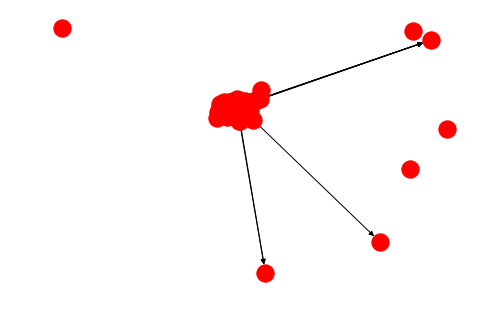

In [154]:
import matplotlib
!matplotlib inline
nx.draw(amongLegisTX)

In [112]:
len(amongLegisTX.edges())

6703

In [130]:
list(set(users["Cuenta"])-set(amongLegisTX.nodes()))

['pezo_ochoa', 'IngaZacarias', 'AnaMaraChoqueh2', 'JoaquinDipasH']

In [131]:
amongLegisTX.add_nodes_from(list(set(users["Cuenta"])-set(amongLegisTX.nodes())))

In [142]:
for e in users["Cuenta"]:
    if e not in amongLegisTX.nodes():
        print (e)

In [148]:
! pip install iteration_utilities

    100% |████████████████████████████████| 112kB 475kB/s ta 0:00:01
  Running setup.py bdist_wheel for iteration-utilities ... done
  Stored in directory: /Users/JoseManuel/Library/Caches/pip/wheels/41/ea/fd/de8371ff85ff0aafd560d50a77ca22d107117094d660131e2a
Successfully built iteration-utilities
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [150]:
from iteration_utilities import duplicates

list(duplicates(users["Cuenta"]))
#[1, 1, 2, 2]

['juliorosas1']

In [146]:
users["Cuenta"]-list(set(users["Cuenta"]))

TypeError: unsupported operand type(s) for -: 'str' and 'list'